In [674]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Optional, Union, List
from sklearn.metrics.pairwise import cosine_similarity
from pykalman import KalmanFilter
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [675]:
import os
import sys
from pathlib import Path

# Get the current working directory
current_working_directory = os.getcwd()
print("Current working directory:", current_working_directory)

Current working directory: /Users/aledpro/Desktop/VUa/First_Year/P6


**Add Data from Yaoyi (Audio Spectrum & Brigtness)**

Trial 1

In [684]:
yaoyi_trial_1_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/yaoyi_trial_1_audio_spec.csv')
yaoyi_trial_1_brightness_raw = pd.read_csv('./data/Brightness/yaoyi_trial_1_brightness.csv')
yaoyi_trial_1_audio_amp_raw = pd.read_csv('./data/Audio_Amp/yaoyi_trial_1_audio_amp.csv')
yaoyi_trial_1_acceleration_raw = pd.read_csv('./data/Acceleration/yaoyi_trial_1_acceleration.csv')

In [685]:
kiara_trial_1_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/kiara_trial_1_audio_spec.csv')
kiara_trial_1_brightness_1 = pd.read_csv('./data/Brightness/kiara_trial_1_brightness_1.csv')
kiara_trial_1_brightness_2 = pd.read_csv('./data/Brightness/kiara_trial_1_brightness_2.csv')
kiara_trial_1_brightness_raw = pd.concat([kiara_trial_1_brightness_1, kiara_trial_1_brightness_2])
kiara_trial_1_brightness_raw.reset_index(drop=True, inplace=True)
kiara_trial_1_brightness_raw.to_csv('./data/Brightness/kiara_trial_1_brigtness.csv', index=True)
kiara_trial_1_audio_amp_raw = pd.read_csv('./data/Audio_Amp/kiara_trial_1_audio_amp.csv')
kiara_trial_1_acceleration_raw = pd.read_csv('./data/Acceleration/kiara_trial_1_acceleration.csv')

In [680]:
kiara_trial_1_brightness_raw

,timestamp,BrightnessEV
0,1717741592172,5.741496
1,1717741592197,5.741496
2,1717741592264,5.753519
3,1717741592331,5.759492
4,1717741592397,5.747520
...,...,...
16093,1717742870648,6.057717
16094,1717742870715,6.050022
16095,1717742870784,6.050022
16096,1717742870847,6.050022


In [686]:
esmee_trial_1_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/esmee_trial_1_audio_spec.csv')
esmee_trial_1_brightness_1 = pd.read_csv('./data/Brightness/esmee_trial_1_brightness_1.csv')
esmee_trial_1_brightness_2 = pd.read_csv('./data/Brightness/esmee_trial_1_brightness_2.csv')
esmee_trial_1_brightness_3 = pd.read_csv('./data/Brightness/esmee_trial_1_brightness_3.csv')
esmee_trial_1_brightness_raw = pd.concat([esmee_trial_1_brightness_1, esmee_trial_1_brightness_2, esmee_trial_1_brightness_3])
esmee_trial_1_brightness_raw.reset_index(drop=True, inplace=True)
esmee_trial_1_brightness_raw.to_csv('./data/Brightness/esmee_trial_1_brightness.csv', index=True)
esmee_trial_1_audio_amp_raw = pd.read_csv('./data/Audio_Amp/esmee_trial_1_audio_amp.csv')
esmee_trial_1_acceleration_raw = pd.read_csv('./data/Acceleration/esmee_trial_1_acceleration.csv')

In [683]:
esmee_trial_1_brightness_raw

,timestamp,BrightnessEV
0,1717739946496,2.606777
1,1717739946551,2.614682
2,1717739946617,2.614682
3,1717739946685,2.598828
4,1717739946751,2.590836
...,...,...
14065,1717741076270,3.494719
14066,1717741076341,3.673567
14067,1717741076404,3.815181
14068,1717741076470,3.916372


In [691]:
def convert_timestamps_to_seconds(df, timestamp_column):
    
    df[timestamp_column] = (df[timestamp_column] - df[timestamp_column].min()) / 1000.0
    
    return df

In [692]:
yaoyi_trial_1_brightness = yaoyi_trial_1_brightness_raw.copy(deep=True)
yaoyi_trial_1_brightness = convert_timestamps_to_seconds(yaoyi_trial_1_brightness, 'timestamp')
yaoyi_trial_1_brightness

,timestamp,BrightnessEV
0,0.000,2.873449
1,0.062,2.866906
2,0.128,2.806646
3,0.195,2.847098
4,0.262,2.912095
...,...,...
13654,910.260,3.064837
13655,910.326,3.041250
13656,910.393,3.025309
13657,910.460,3.033302


In [693]:
kiara_trial_1_brightness = kiara_trial_1_brightness_raw.copy(deep=True)
kiara_trial_1_brightness = convert_timestamps_to_seconds(kiara_trial_1_brightness, 'timestamp')
kiara_trial_1_brightness

,timestamp,BrightnessEV
0,0.000,5.741496
1,0.025,5.741496
2,0.092,5.753519
3,0.159,5.759492
4,0.225,5.747520
...,...,...
16093,1278.476,6.057717
16094,1278.543,6.050022
16095,1278.612,6.050022
16096,1278.675,6.050022


In [694]:
esmee_trial_1_brightness = esmee_trial_1_brightness_raw.copy(deep=True)
esmee_trial_1_brightness = convert_timestamps_to_seconds(esmee_trial_1_brightness, 'timestamp')
esmee_trial_1_brightness

,timestamp,BrightnessEV
0,0.000,2.606777
1,0.055,2.614682
2,0.121,2.614682
3,0.189,2.598828
4,0.255,2.590836
...,...,...
14065,1129.774,3.494719
14066,1129.845,3.673567
14067,1129.908,3.815181
14068,1129.974,3.916372


Trial 2

In [695]:
yaoyi_trial_2_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/yaoyi_trial_2_audio_spec.csv')
yaoyi_trial_2_brightness_raw = pd.read_csv('./data/Brightness/yaoyi_trial_2_brightness.csv')
yaoyi_trial_2_audio_amp_raw = pd.read_csv('./data/Audio_Amp/yaoyi_trial_2_audio_amp.csv')
yaoyi_trial_2_acceleration_raw = pd.read_csv('./data/Acceleration/yaoyi_trial_2_acceleration.csv')

In [696]:
kiara_trial_2_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/kiara_trial_2_audio_spec.csv')
kiara_trial_2_brightness_1 = pd.read_csv('./data/Brightness/kiara_trial_2_brightness_1.csv')
kiara_trial_2_brightness_2 = pd.read_csv('./data/Brightness/kiara_trial_2_brightness_2.csv')
kiara_trial_2_brightness_raw = pd.concat([kiara_trial_2_brightness_1, kiara_trial_2_brightness_2])
kiara_trial_2_brightness_raw.reset_index(drop=True, inplace=True)
kiara_trial_2_brightness_raw.to_csv('./data/Brightness/kiara_trial_2_brigtness.csv', index=True)
kiara_trial_2_audio_amp_raw = pd.read_csv('./data/Audio_Amp/kiara_trial_2_audio_amp.csv')
kiara_trial_2_acceleration_raw = pd.read_csv('./data/Acceleration/kiara_trial_2_acceleration.csv')

In [697]:
esmee_trial_2_audio_spectrum_raw = pd.read_csv('./data/Audio_Spectrum/esmee_trial_1_audio_spec.csv')
esmee_trial_2_brightness_raw = pd.read_csv('./data/Brightness/esmee_trial_2_brightness.csv')
esmee_trial_2_audio_amp_raw = pd.read_csv('./data/Audio_Amp/esmee_trial_2_audio_amp.csv')
esmee_trial_2_acceleration_raw = pd.read_csv('./data/Acceleration/esmee_trial_2_acceleration.csv')

In [698]:
yaoyi_trial_2_brightness = yaoyi_trial_2_brightness_raw.copy(deep=True)
yaoyi_trial_2_brightness = convert_timestamps_to_seconds(yaoyi_trial_2_brightness, 'timestamp')

In [699]:
kiara_trial_2_brightness = kiara_trial_2_brightness_raw.copy(deep=True)
kiara_trial_2_brightness = convert_timestamps_to_seconds(kiara_trial_2_brightness, 'timestamp')

In [700]:
esmee_trial_2_brightness = esmee_trial_2_brightness_raw.copy(deep=True)
esmee_trial_2_brightness = convert_timestamps_to_seconds(esmee_trial_2_brightness, 'timestamp')

**Aggragate**

In [701]:
def aggregate_data_multiple_columns(df, timestamp_column, interval, features, trial_num, experimenter):

    df_copy = df.copy()

    df_copy['interval_group'] = (df_copy[timestamp_column] // interval) * interval
    
    aggregation_functions = {col: ['max', 'min', 'median', 'mean', 'std'] for col in features}
    
    aggregated = df_copy.groupby('interval_group').agg(aggregation_functions)
    
    aggregated.columns = ['_'.join(col).strip() for col in aggregated.columns.values]
    
    aggregated.reset_index(inplace=True)
    
    aggregated.rename(columns={'interval_group': 'timestamp'}, inplace=True)
    
    max_time = df[timestamp_column].max()
    last_group = (max_time // interval) * interval
    if max_time > last_group:
        last_group_data = df_copy[df_copy[timestamp_column] > last_group]
        if not last_group_data.empty:
            last_group_stats = last_group_data[features].agg(aggregation_functions).T
            new_columns = {}
            for index, row in last_group_stats.iterrows():
                variable_name = index
                for col in last_group_stats.columns:
                    new_columns[col] = f"{variable_name}_{col}"  # Construct new column name
            last_group_stats.rename(columns=new_columns, inplace=True)
            last_group_stats.drop_duplicates(inplace=True)
            last_group_stats['timestamp'] = max_time
            aggregated = pd.merge(aggregated, last_group_stats, how='outer')
            aggregated['trial'] = trial_num
            aggregated['experimenter'] = experimenter
            
    return aggregated

In [620]:
yaoyi_trial_1_brightness_agg = aggregate_data_multiple_columns(yaoyi_trial_1_brightness, 'timestamp', 10, ['BrightnessEV'], '1', 'Yaoyi')
yaoyi_trial_2_brightness_agg = aggregate_data_multiple_columns(yaoyi_trial_2_brightness, 'timestamp', 10, ['BrightnessEV'], '2', 'Yaoyi')
yaoyi_trial_2_brightness_agg

,timestamp,BrightnessEV_max,BrightnessEV_min,BrightnessEV_median,BrightnessEV_mean,BrightnessEV_std,trial,experimenter
0,0.000,2.588222,1.288233,1.837364,1.874255,0.307091,2,Yaoyi
1,10.000,2.949467,1.741918,2.388840,2.408543,0.385331,2,Yaoyi
2,20.000,3.183362,1.922627,3.078344,2.778584,0.472518,2,Yaoyi
3,30.000,3.183362,2.155097,3.003534,2.822747,0.344335,2,Yaoyi
4,40.000,3.122399,1.859866,2.377251,2.491915,0.378378,2,Yaoyi
...,...,...,...,...,...,...,...,...
68,680.000,4.230074,3.254485,4.011071,3.931165,0.319953,2,Yaoyi
69,690.000,4.189180,3.009313,3.984517,3.846419,0.361844,2,Yaoyi
70,700.000,4.102669,3.415472,3.735839,3.695416,0.190615,2,Yaoyi
71,710.000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi


In [713]:
yaoyi_trial_1_audio_amp_agg = aggregate_data_multiple_columns(yaoyi_trial_1_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '1', 'Yaoyi')
yaoyi_trial_2_audio_amp_agg = aggregate_data_multiple_columns(yaoyi_trial_2_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '2', 'Yaoyi')

In [705]:
yaoyi_trial_1_audio_amp_agg = aggregate_data_multiple_columns(yaoyi_trial_1_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '1', 'Yaoyi')
yaoyi_trial_2_audio_amp_agg = aggregate_data_multiple_columns(yaoyi_trial_2_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '2', 'Yaoyi')

In [707]:
yaoyi_trial_2_audio_amp_agg

,timestamp,Sound pressure level (dB)_max,Sound pressure level (dB)_min,Sound pressure level (dB)_median,Sound pressure level (dB)_mean,Sound pressure level (dB)_std,trial,experimenter
0,0.000000,-4.800901,-24.889771,-15.099072,-14.927143,2.682738,2,Yaoyi
1,10.000000,-13.433969,-27.007045,-21.239148,-20.841527,2.368929,2,Yaoyi
2,20.000000,-19.765255,-28.080954,-24.889888,-24.838954,1.473149,2,Yaoyi
3,30.000000,-19.934854,-27.984844,-25.356360,-25.244101,1.420107,2,Yaoyi
4,40.000000,-18.824371,-28.104687,-24.467992,-24.109713,2.200394,2,Yaoyi
...,...,...,...,...,...,...,...,...
68,680.000000,-15.346447,-23.817980,-20.136991,-19.998536,1.817357,2,Yaoyi
69,690.000000,-14.998075,-23.572068,-19.182910,-19.215333,1.740077,2,Yaoyi
70,700.000000,-17.907036,-24.509700,-21.154955,-21.061506,1.602042,2,Yaoyi
71,710.000000,-7.227903,-23.673293,-16.742821,-16.913281,3.942399,2,Yaoyi


In [720]:
yaoyi_trial_1_acceleration_agg = aggregate_data_multiple_columns(yaoyi_trial_1_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '1', 'Yaoyi')
yaoyi_trial_1_acceleration_agg = yaoyi_trial_1_acceleration_agg.iloc[:-3]
yaoyi_trial_2_acceleration_agg = aggregate_data_multiple_columns(yaoyi_trial_2_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '2', 'Yaoyi')
yaoyi_trial_2_acceleration_agg = yaoyi_trial_2_acceleration_agg.iloc[:-3]

In [721]:
yaoyi_trial_2_acceleration_agg

,timestamp,Linear Acceleration x (m/s^2)_max,Linear Acceleration x (m/s^2)_min,Linear Acceleration x (m/s^2)_median,Linear Acceleration x (m/s^2)_mean,Linear Acceleration x (m/s^2)_std,Linear Acceleration y (m/s^2)_max,Linear Acceleration y (m/s^2)_min,Linear Acceleration y (m/s^2)_median,Linear Acceleration y (m/s^2)_mean,...,Linear Acceleration z (m/s^2)_median,Linear Acceleration z (m/s^2)_mean,Linear Acceleration z (m/s^2)_std,Absolute acceleration (m/s^2)_max,Absolute acceleration (m/s^2)_min,Absolute acceleration (m/s^2)_median,Absolute acceleration (m/s^2)_mean,Absolute acceleration (m/s^2)_std,trial,experimenter
0,0.00000,0.888742,-0.116710,0.522245,0.465298,0.210842,0.364837,-1.658581,-0.462581,-0.410162,...,0.101260,0.095143,0.277550,1.811723,0.099463,0.819612,0.741543,0.336587,2,Yaoyi
1,10.00000,0.626127,-0.514284,0.201213,0.172343,0.146672,1.492519,-0.767247,0.085382,0.130285,...,0.087025,0.078486,0.257692,1.681428,0.033067,0.295879,0.362710,0.245687,2,Yaoyi
2,20.00000,-0.007641,-0.987602,-0.316544,-0.361955,0.226103,0.820380,-0.692262,0.013127,0.014714,...,0.050117,0.045518,0.153299,1.609800,0.027319,0.348734,0.409033,0.238946,2,Yaoyi
3,30.00000,0.211331,-0.238080,-0.042882,-0.061292,0.060150,0.642714,-0.458663,0.001021,0.004408,...,0.039168,0.042486,0.098801,0.836996,0.011781,0.085158,0.132018,0.117735,2,Yaoyi
4,40.00000,0.020843,-0.992348,-0.326060,-0.354993,0.274603,0.457481,-0.789299,-0.017062,-0.018997,...,0.042743,0.042329,0.124905,1.600631,0.005625,0.343212,0.382264,0.282556,2,Yaoyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,680.00000,0.477210,-0.191063,0.100080,0.113945,0.124082,0.435402,-0.553073,-0.089488,-0.089893,...,-0.055198,-0.017373,0.681637,1.985116,0.021133,0.562164,0.630700,0.351499,2,Yaoyi
69,690.00000,0.266528,-0.221788,0.027573,0.026807,0.088812,0.396850,-0.525274,-0.034799,-0.044931,...,-0.036296,0.000636,0.690083,1.948387,0.011459,0.507381,0.599107,0.384249,2,Yaoyi
70,700.00000,0.237625,-0.187365,0.020455,0.024887,0.079227,0.698664,-0.521332,0.067892,0.063606,...,-0.004341,0.004498,0.745751,2.276475,0.032589,0.600884,0.662210,0.398164,2,Yaoyi
71,710.00000,0.688329,-0.232632,0.153980,0.164130,0.148901,0.628524,-0.787180,-0.005824,0.002018,...,-0.026916,0.000282,0.626996,3.304463,0.055002,0.512820,0.596464,0.363571,2,Yaoyi


In [722]:
yaoyi_trial_1_audio_spectrum_agg = aggregate_data_multiple_columns(yaoyi_trial_1_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '1', 'Yaoyi')
yaoyi_trial_2_audio_spectrum_agg = aggregate_data_multiple_columns(yaoyi_trial_2_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '2', 'Yaoyi')
yaoyi_trial_2_audio_spectrum_agg

,timestamp,Peak-Frequency_max,Peak-Frequency_min,Peak-Frequency_median,Peak-Frequency_mean,Peak-Frequency_std,trial,experimenter
0,0.000000,187.5000,23.4375,70.3125,85.026626,37.094901,2,Yaoyi
1,10.000000,164.0625,23.4375,70.3125,97.856571,44.017025,2,Yaoyi
2,20.000000,1921.8750,23.4375,164.0625,281.049679,455.863255,2,Yaoyi
3,30.000000,1757.8125,46.8750,164.0625,184.906915,208.975941,2,Yaoyi
4,40.000000,328.1250,46.8750,164.0625,135.016026,46.587393,2,Yaoyi
...,...,...,...,...,...,...,...,...
69,690.000000,210.9375,46.8750,70.3125,76.994681,25.633219,2,Yaoyi
70,700.000000,281.2500,23.4375,70.3125,96.254006,48.901565,2,Yaoyi
71,710.000000,187.5000,23.4375,70.3125,74.118590,31.684800,2,Yaoyi
72,720.000000,70.3125,46.8750,70.3125,62.500000,13.531647,2,Yaoyi


In [723]:
def correct_sequence(df, column):

    values = df[column].tolist()
    expected_value = values[0]
    
    for i in range(1, len(values)):
        expected_value += 20
        if values[i] != expected_value:
            values[i] = expected_value

    if len(values) > 1 and values[-1] - values[-2] != 20:
        values[-1] = df[column].iloc[-1]
    
    df[column] = values

In [724]:
kiara_trial_1_brightness_agg = aggregate_data_multiple_columns(kiara_trial_1_brightness, 'timestamp', 10, ['BrightnessEV'], '1', 'Kiara')
correct_sequence(kiara_trial_1_brightness_agg, 'timestamp')
# kiara_trial_1_brigtness_agg = kiara_trial_1_brightness_agg.iloc[:-2]
kiara_trial_2_brightness_agg = aggregate_data_multiple_columns(kiara_trial_2_brightness, 'timestamp', 10, ['BrightnessEV'], '2', 'Kiara')
# kiara_trial_2_brigtness_agg = kiara_trial_1_brightness_agg.iloc[:-9]

In [725]:
kiara_trial_1_audio_spectrum_agg = aggregate_data_multiple_columns(kiara_trial_1_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '1', 'Kiara')
# kiara_trial_1_audio_spectrum_agg = kiara_trial_1_audio_spectrum_agg.iloc[:-1]
kiara_trial_2_audio_spectrum_agg = aggregate_data_multiple_columns(kiara_trial_2_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '2', 'Kiara')
kiara_trial_2_audio_spectrum_agg

,timestamp,Peak-Frequency_max,Peak-Frequency_min,Peak-Frequency_median,Peak-Frequency_mean,Peak-Frequency_std,trial,experimenter
0,0.000000,210.9375,23.4375,46.8750,55.090206,24.457540,2,Kiara
1,10.000000,117.1875,23.4375,46.8750,55.211018,13.117838,2,Kiara
2,20.000000,187.5000,46.8750,46.8750,61.832601,22.713104,2,Kiara
3,30.000000,187.5000,46.8750,46.8750,59.319690,23.607880,2,Kiara
4,40.000000,234.3750,46.8750,46.8750,60.396635,29.658891,2,Kiara
...,...,...,...,...,...,...,...,...
58,580.000000,187.5000,23.4375,70.3125,94.049202,46.648131,2,Kiara
59,590.000000,1898.4375,23.4375,164.0625,193.910256,365.907368,2,Kiara
60,600.000000,539.0625,23.4375,164.0625,149.338942,63.282812,2,Kiara
61,610.000000,164.0625,46.8750,93.7500,106.875000,52.877410,2,Kiara


In [726]:
kiara_trial_1_audio_amp_agg = aggregate_data_multiple_columns(kiara_trial_1_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '1', 'Kiara')
kiara_trial_2_audio_amp_agg = aggregate_data_multiple_columns(kiara_trial_2_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '2', 'Kiara')

In [727]:
kiara_trial_1_acceleration_agg = aggregate_data_multiple_columns(kiara_trial_1_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '1', 'Kiara')
kiara_trial_1_acceleration_agg = kiara_trial_1_acceleration_agg.iloc[:-3]
kiara_trial_2_acceleration_agg = aggregate_data_multiple_columns(kiara_trial_2_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '2', 'Kiara')
kiara_trial_2_acceleration_agg = kiara_trial_2_acceleration_agg.iloc[:-3]

In [728]:
esmee_trial_1_brightness_agg = aggregate_data_multiple_columns(esmee_trial_1_brightness, 'timestamp', 10, ['BrightnessEV'], '1', 'Esmee')
correct_sequence(esmee_trial_1_brightness_agg, 'timestamp')
# esmee_trial_1_brightness_agg = esmee_trial_1_brightness_agg.iloc[:-2]
esmee_trial_2_brightness_agg = aggregate_data_multiple_columns(esmee_trial_2_brightness, 'timestamp', 10, ['BrightnessEV'], '2', 'Esmee')

In [729]:
esmee_trial_1_audio_spectrum_agg = aggregate_data_multiple_columns(esmee_trial_1_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '1', 'Esmee')
# esmee_trial_1_audio_spectrum_agg = esmee_trial_1_audio_spectrum_agg.iloc[:-1]
esmee_trial_2_audio_spectrum_agg = aggregate_data_multiple_columns(esmee_trial_2_audio_spectrum_raw, 'Time (s)', 10, ['Peak-Frequency'], '2', 'Esmee')

In [730]:
esmee_trial_1_audio_amp_agg = aggregate_data_multiple_columns(esmee_trial_1_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '1', 'Esmee')
esmee_trial_2_audio_amp_agg = aggregate_data_multiple_columns(esmee_trial_2_audio_amp_raw, 'Time (s)', 10, ['Sound pressure level (dB)'], '2', 'Esmee')

In [731]:
esmee_trial_1_acceleration_agg = aggregate_data_multiple_columns(esmee_trial_1_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '1', 'Esmee')
esmee_trial_1_acceleration_agg = esmee_trial_1_acceleration_agg.iloc[:-3]
esmee_trial_2_acceleration_agg = aggregate_data_multiple_columns(esmee_trial_2_acceleration_raw, 'Time (s)', 10, ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)'], '2', 'Esmee')
esmee_trial_2_acceleration_agg = esmee_trial_2_acceleration_agg.iloc[:-3]

In [732]:
def merge_pd_horizontally(pd_list, key_cols=['timestamp', 'trial', 'experimenter']):
    
    pd_list_copy = [df.copy() for df in pd_list]
    max_timestamp_col = max(pd_list_copy, key=lambda df: df['timestamp'].max())['timestamp']

    for df in pd_list_copy:
        if df['timestamp'] is not max_timestamp_col:
            df.drop(columns=['timestamp'], inplace=True)

    merged_df = pd.concat(pd_list_copy, axis=1, join='outer')
    merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]
    merged_df[['trial', 'experimenter']] = merged_df[['trial', 'experimenter']].ffill()

    return merged_df

In [733]:
yaoyi_trial_1_merged = merge_pd_horizontally([yaoyi_trial_1_brightness_agg, yaoyi_trial_1_audio_spectrum_agg, yaoyi_trial_1_audio_amp_agg, yaoyi_trial_1_acceleration_agg])

In [734]:
kiara_trial_1_merged = merge_pd_horizontally([kiara_trial_1_brightness_agg, kiara_trial_1_audio_spectrum_agg, kiara_trial_1_audio_amp_agg, kiara_trial_1_acceleration_agg])

In [735]:
esmee_trial_1_merged = merge_pd_horizontally([esmee_trial_1_brightness_agg, esmee_trial_1_audio_spectrum_agg, esmee_trial_1_audio_amp_agg, esmee_trial_1_acceleration_agg])

In [736]:
kiara_trial_2_merged = merge_pd_horizontally([kiara_trial_2_brightness_agg, kiara_trial_2_audio_spectrum_agg, kiara_trial_2_audio_amp_agg, kiara_trial_2_acceleration_agg])

In [737]:
yaoyi_trial_2_merged = merge_pd_horizontally([yaoyi_trial_2_brightness_agg, yaoyi_trial_2_audio_spectrum_agg, yaoyi_trial_2_audio_amp_agg ,yaoyi_trial_2_acceleration_agg])

In [738]:
esmee_trial_2_merged = merge_pd_horizontally([esmee_trial_2_brightness_agg, esmee_trial_2_audio_spectrum_agg, esmee_trial_2_audio_amp_agg, esmee_trial_2_acceleration_agg])

In [739]:
final_merged = pd.concat([yaoyi_trial_1_merged, yaoyi_trial_2_merged, kiara_trial_1_merged, kiara_trial_2_merged,
                         esmee_trial_1_merged, esmee_trial_2_merged], axis=0).reset_index(drop=True)

In [752]:
final_merged.columns

Index(['timestamp', 'BrightnessEV_max', 'BrightnessEV_min',
       'BrightnessEV_median', 'BrightnessEV_mean', 'BrightnessEV_std', 'trial',
       'experimenter', 'Peak-Frequency_max', 'Peak-Frequency_min',
       'Peak-Frequency_median', 'Peak-Frequency_mean', 'Peak-Frequency_std',
       'Sound pressure level (dB)_max', 'Sound pressure level (dB)_min',
       'Sound pressure level (dB)_median', 'Sound pressure level (dB)_mean',
       'Sound pressure level (dB)_std', 'Linear Acceleration x (m/s^2)_max',
       'Linear Acceleration x (m/s^2)_min',
       'Linear Acceleration x (m/s^2)_median',
       'Linear Acceleration x (m/s^2)_mean',
       'Linear Acceleration x (m/s^2)_std',
       'Linear Acceleration y (m/s^2)_max',
       'Linear Acceleration y (m/s^2)_min',
       'Linear Acceleration y (m/s^2)_median',
       'Linear Acceleration y (m/s^2)_mean',
       'Linear Acceleration y (m/s^2)_std',
       'Linear Acceleration z (m/s^2)_max',
       'Linear Acceleration z (m/s^2)_min

****

In [742]:
def plot_boxplot(df, sensor_to_be_plotted):

    df = pd.DataFrame(df)
    custom_palette = sns.color_palette("husl", len(df['experimenter'].unique()))

    plt.figure(figsize=(20, 8))
    sns.boxplot(data=df, x='trial', y=sensor_to_be_plotted, hue='experimenter', dodge=0.8, palette=custom_palette)
    plt.title(f'Box plot of {sensor_to_be_plotted} grouped by trial and experimenter')
    plt.xlabel('Trial')
    plt.ylabel(f'{sensor_to_be_plotted}')
    plt.legend(title='Experimenter')
    plt.show()

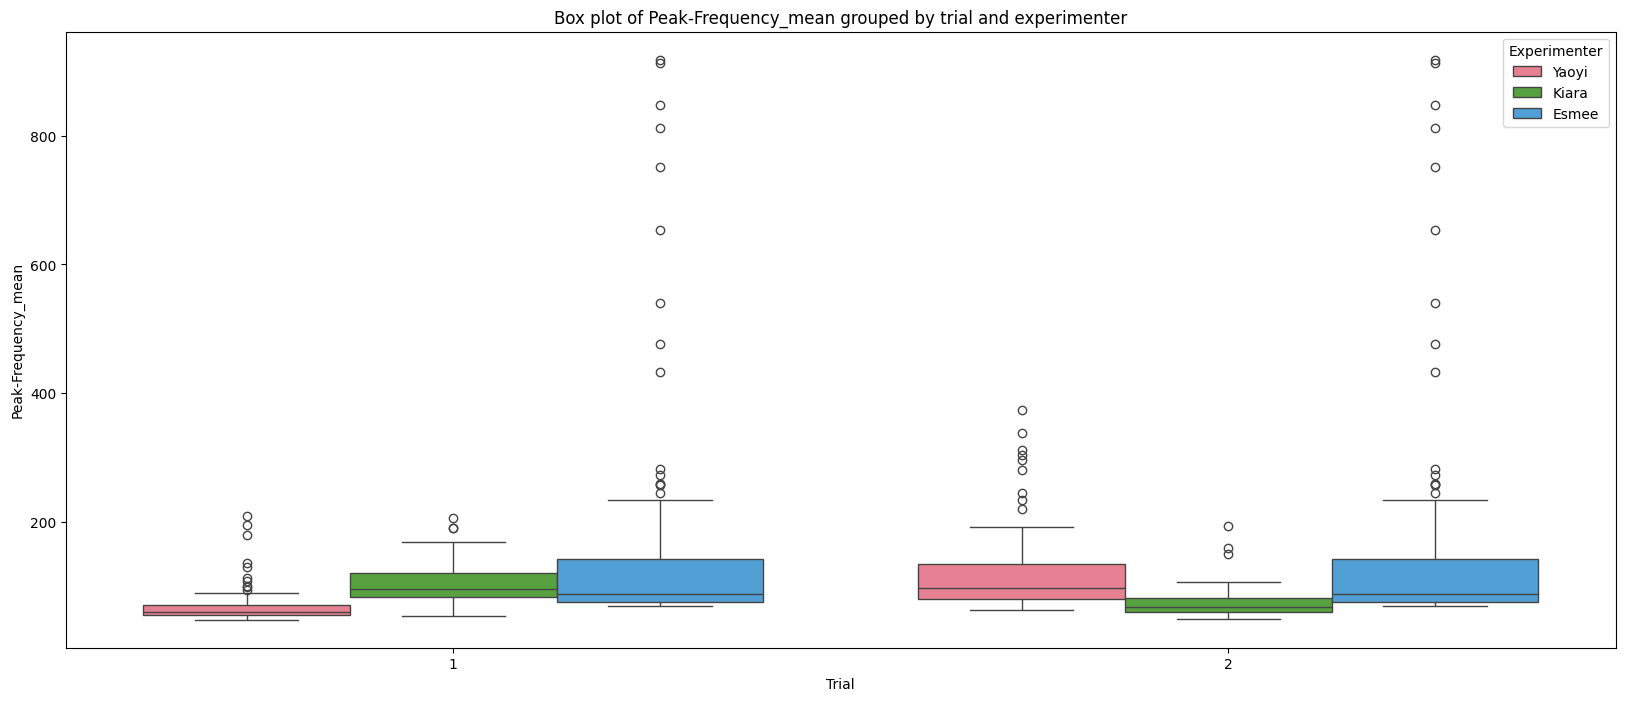

In [743]:
plot_boxplot(final_merged, 'Peak-Frequency_mean')

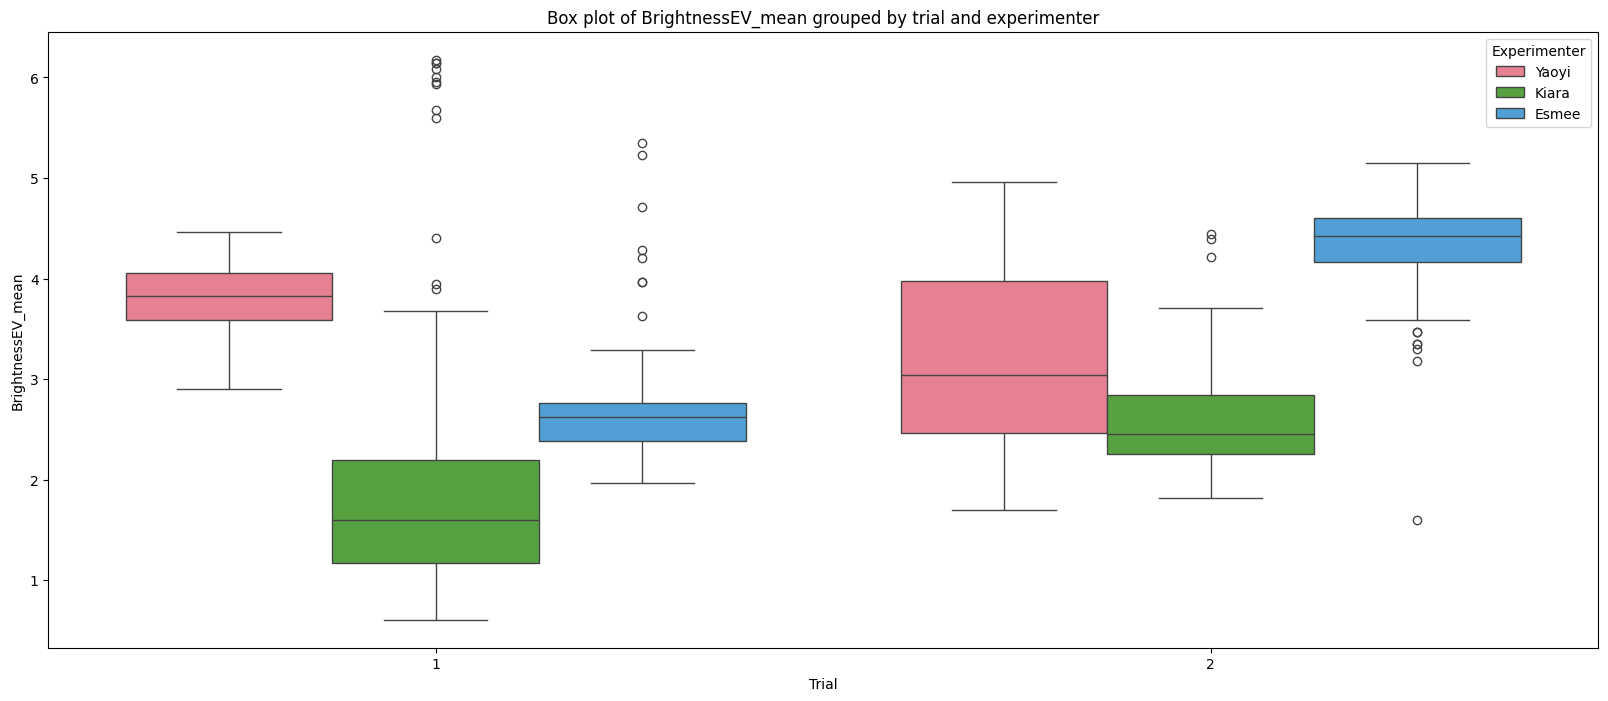

In [744]:
plot_boxplot(final_merged, 'BrightnessEV_mean')

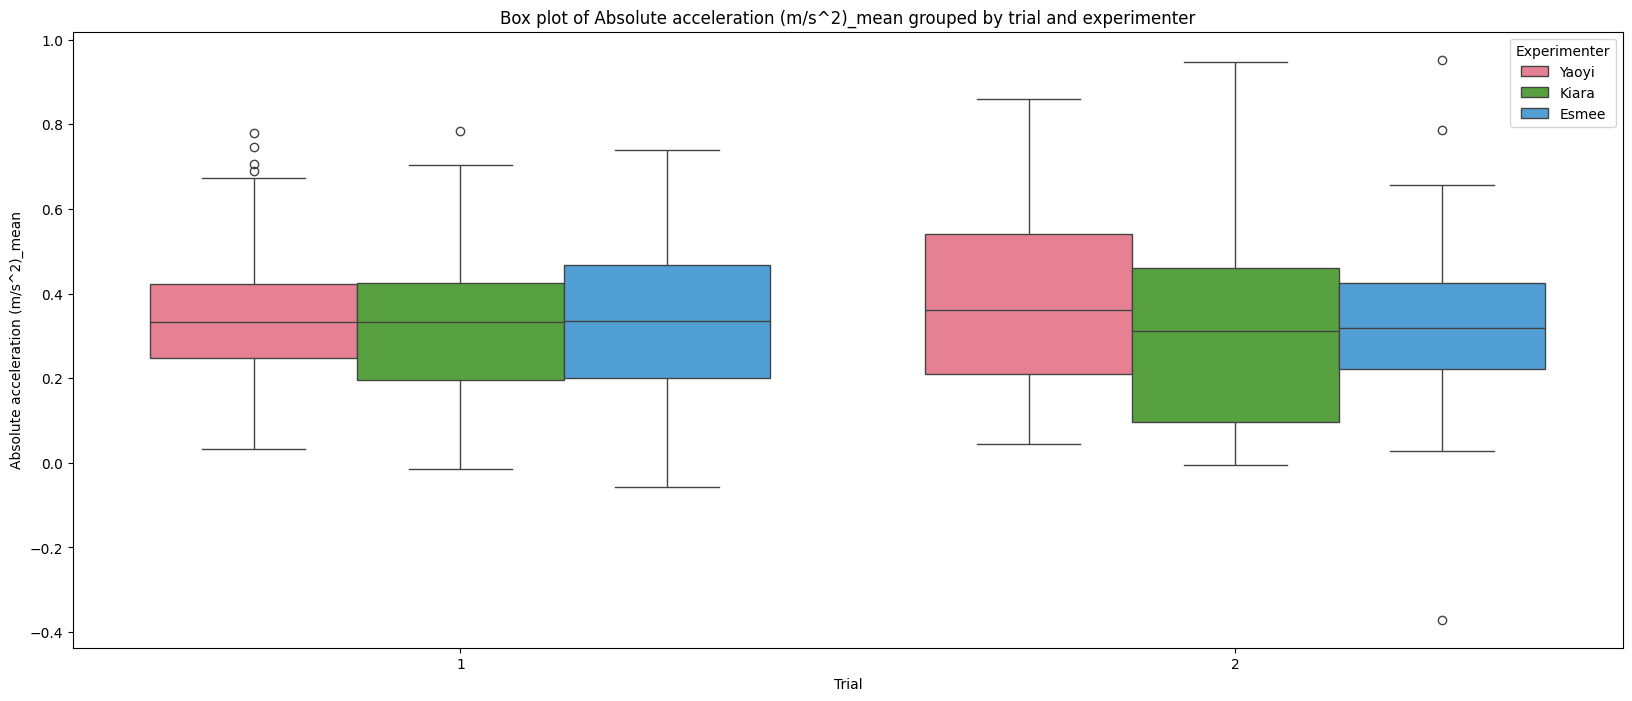

In [746]:
plot_boxplot(final_merged, 'Absolute acceleration (m/s^2)_mean')

In [748]:
def plot_linechart(df, sensor_to_be_plotted):

    df = pd.DataFrame(df)

    plt.figure(figsize=(30, 6))
    sns.lineplot(data=df, x='timestamp', y=sensor_to_be_plotted, hue='experimenter', style='trial', markers=True)
    plt.title('Line chart of {} grouped by experimenter and trial'.format(sensor_to_be_plotted))
    plt.xlabel('Timestamp')
    plt.ylabel(sensor_to_be_plotted)
    plt.legend(title='Experimenter')
    plt.show()

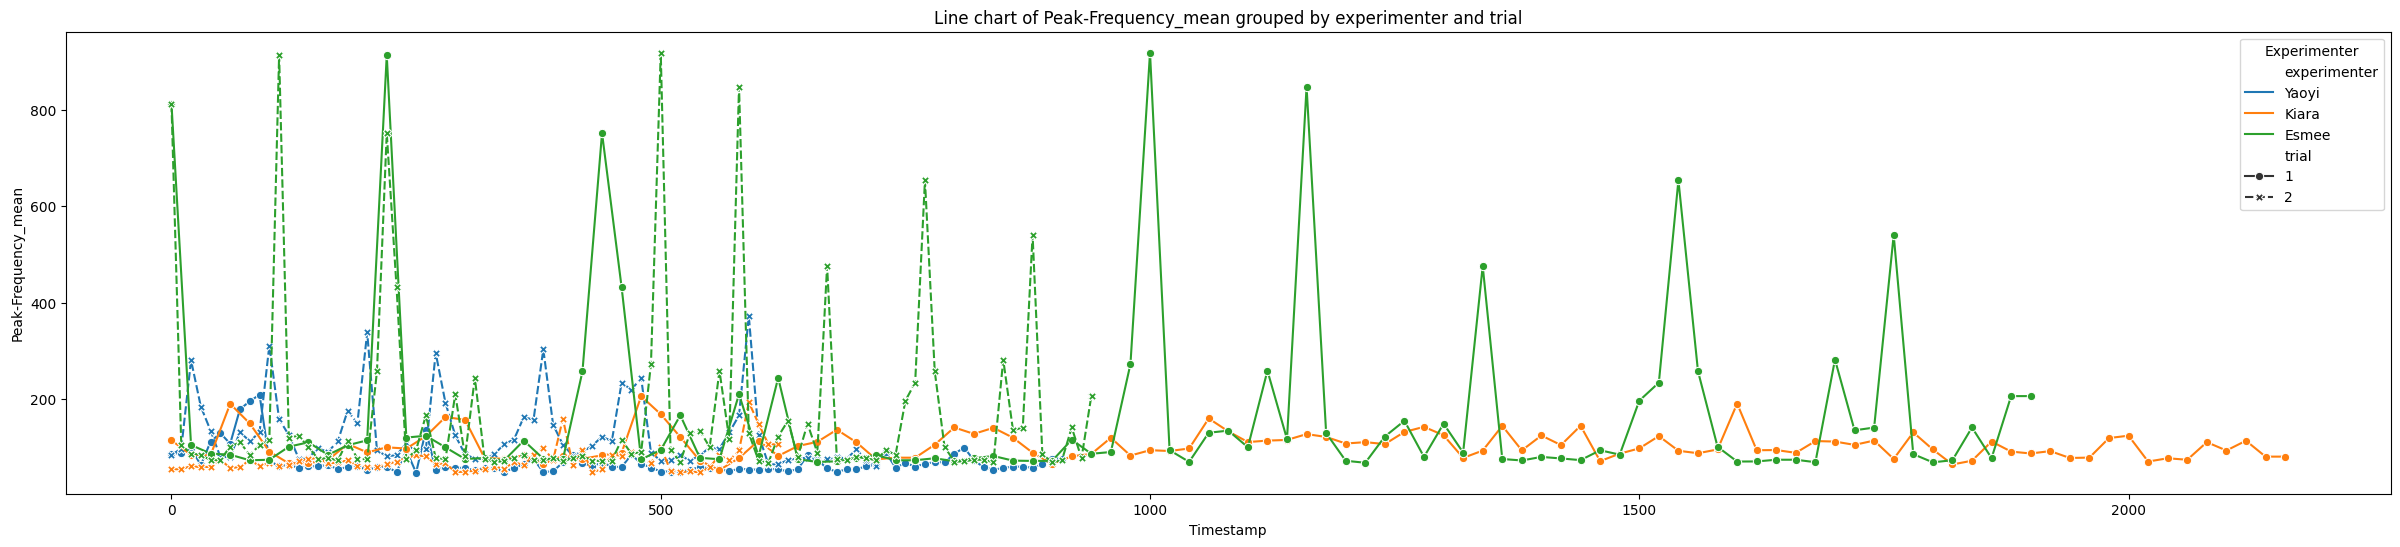

In [749]:
plot_linechart(final_merged, 'Peak-Frequency_mean')

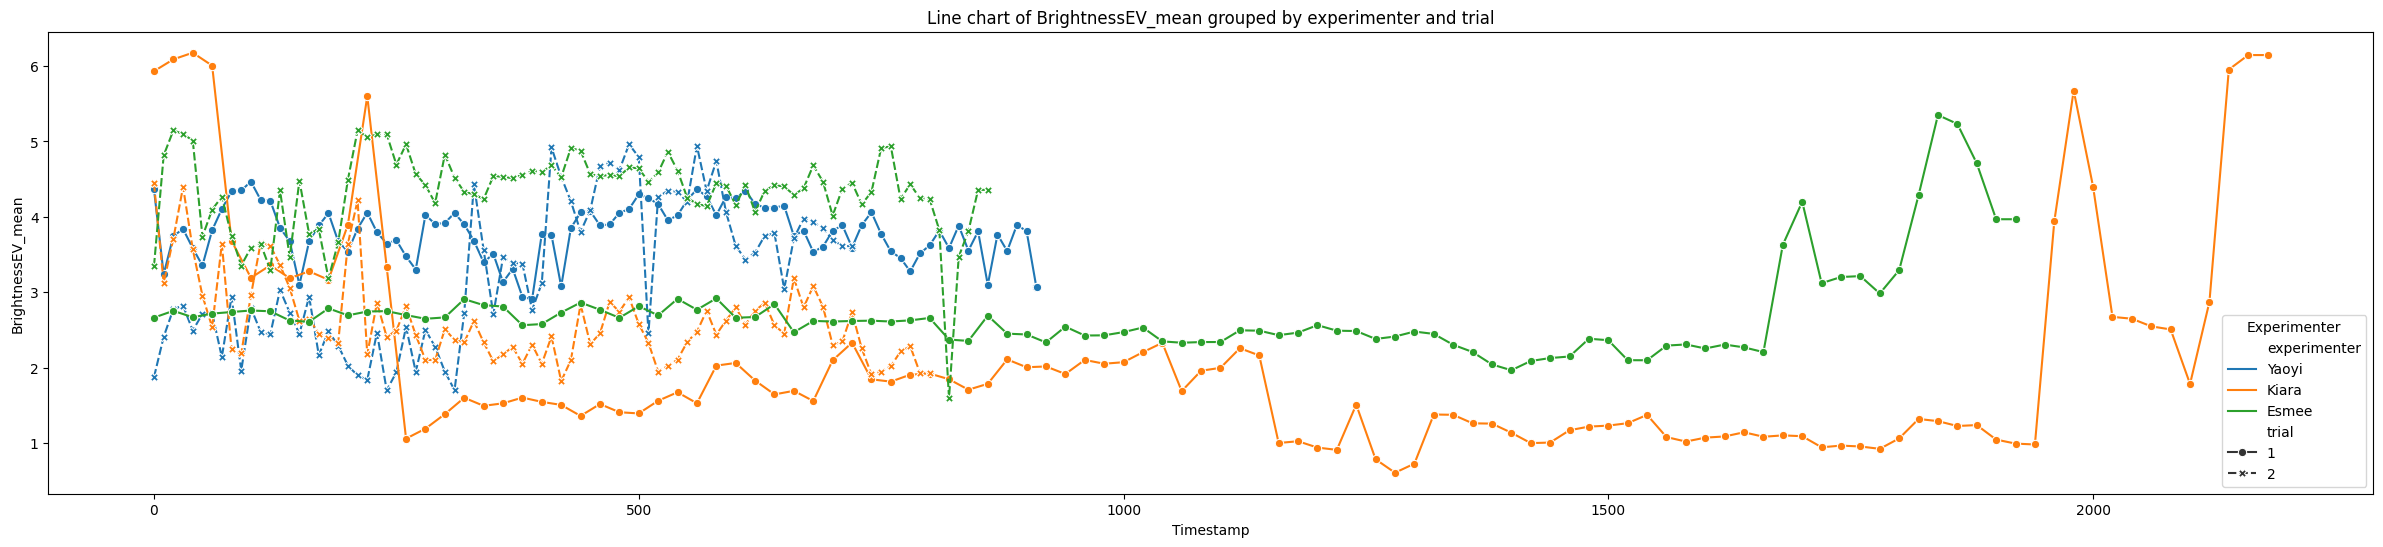

In [750]:
plot_linechart(final_merged, 'BrightnessEV_mean')

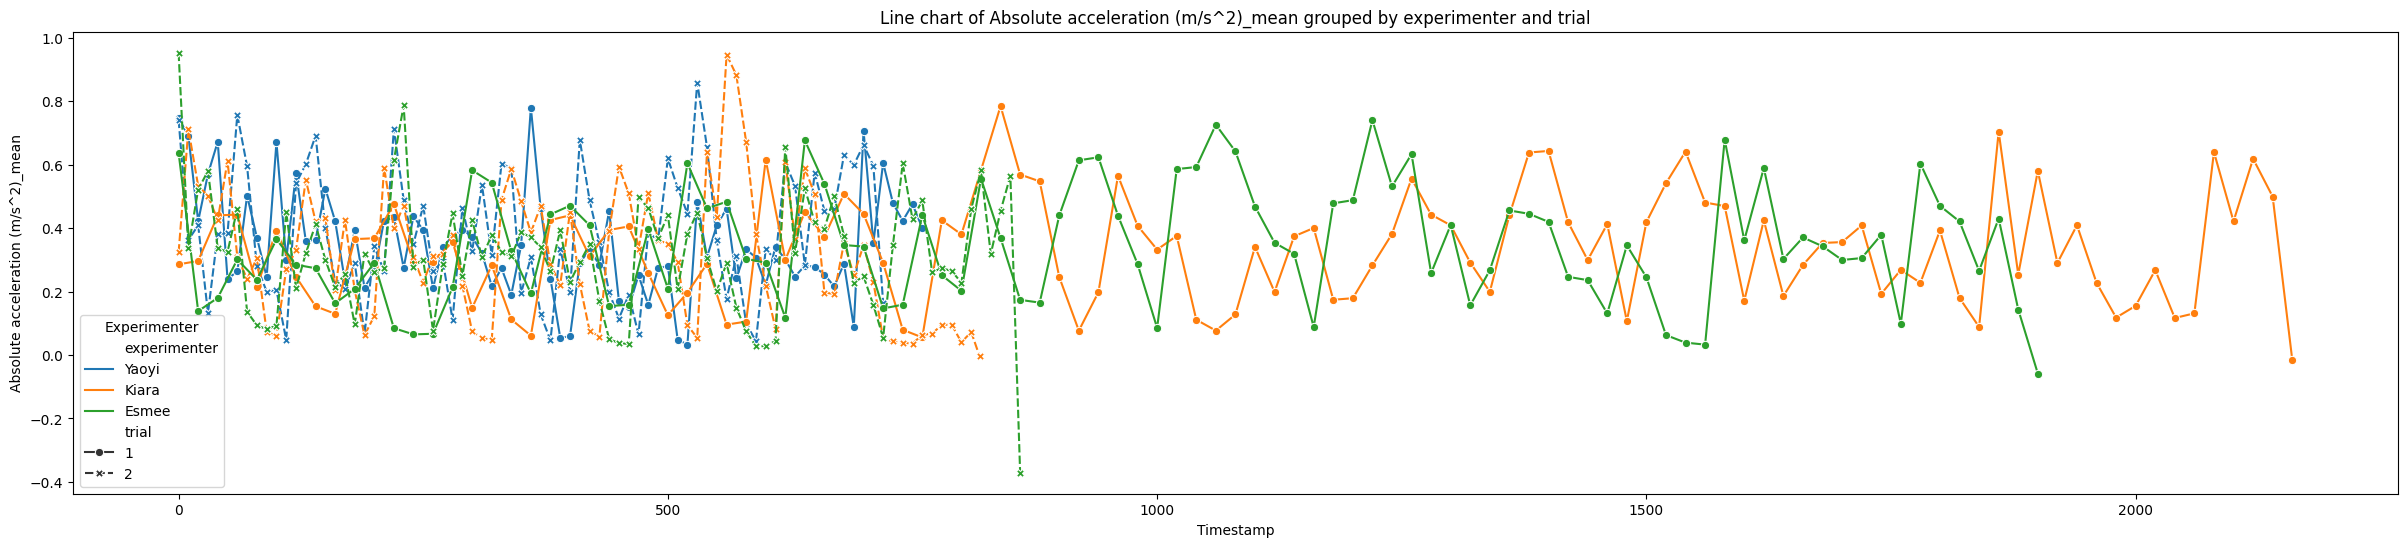

In [753]:
plot_linechart(final_merged, 'Absolute acceleration (m/s^2)_mean')

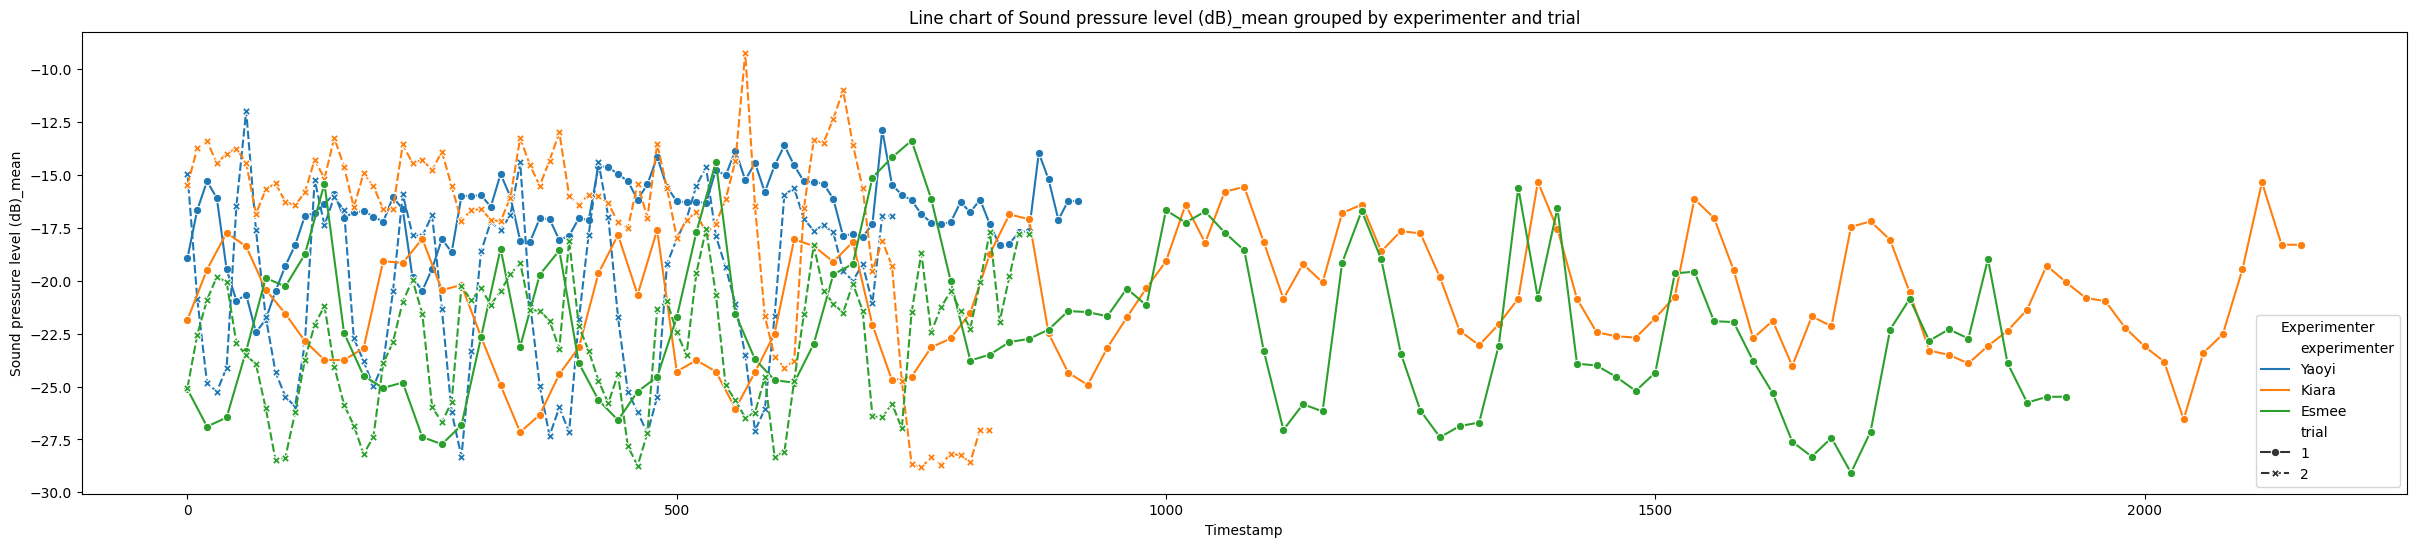

In [754]:
plot_linechart(final_merged, 'Sound pressure level (dB)_mean')

# **Missing Value**

In [755]:
def interpolate_group(group):
    # group = group.set_index('timestamp')
    group = group.interpolate(method='linear', axis=0)
    group.reset_index(drop=True, inplace=True)
    return group

In [756]:
groups = final_merged.groupby("experimenter")
final_merged = groups.apply(interpolate_group)
final_merged.reset_index(drop=True, inplace=True)

In [757]:
final_merged.isna().sum()

timestamp                               0
BrightnessEV_max                        0
BrightnessEV_min                        0
BrightnessEV_median                     0
BrightnessEV_mean                       0
BrightnessEV_std                        0
trial                                   0
experimenter                            0
Peak-Frequency_max                      0
Peak-Frequency_min                      0
Peak-Frequency_median                   0
Peak-Frequency_mean                     0
Peak-Frequency_std                      0
Sound pressure level (dB)_max           0
Sound pressure level (dB)_min           0
Sound pressure level (dB)_median        0
Sound pressure level (dB)_mean          0
Sound pressure level (dB)_std           0
Linear Acceleration x (m/s^2)_max       0
Linear Acceleration x (m/s^2)_min       0
Linear Acceleration x (m/s^2)_median    0
Linear Acceleration x (m/s^2)_mean      0
Linear Acceleration x (m/s^2)_std       0
Linear Acceleration y (m/s^2)_max 

In [758]:
final_merged

,timestamp,BrightnessEV_max,BrightnessEV_min,BrightnessEV_median,BrightnessEV_mean,BrightnessEV_std,trial,experimenter,Peak-Frequency_max,Peak-Frequency_min,...,Linear Acceleration z (m/s^2)_max,Linear Acceleration z (m/s^2)_min,Linear Acceleration z (m/s^2)_median,Linear Acceleration z (m/s^2)_mean,Linear Acceleration z (m/s^2)_std,Absolute acceleration (m/s^2)_max,Absolute acceleration (m/s^2)_min,Absolute acceleration (m/s^2)_median,Absolute acceleration (m/s^2)_mean,Absolute acceleration (m/s^2)_std
0,0.000000,2.726657,2.566588,2.668838,2.663895,0.040507,1,Esmee,2203.1250,46.8750,...,29.327699,-8.317416,0.061914,0.055968,1.268079,29.953794,0.012650,0.210228,0.637607,1.468186
1,20.000000,2.790788,2.689758,2.762637,2.754005,0.025433,1,Esmee,351.5625,46.8750,...,0.440904,-0.529983,0.060604,0.062936,0.097689,0.615490,0.008717,0.099924,0.138419,0.106594
2,40.000000,2.776781,2.514413,2.723005,2.668750,0.090246,1,Esmee,351.5625,23.4375,...,0.418757,-0.265524,0.060082,0.057815,0.073541,0.675073,0.015397,0.102556,0.180120,0.144877
3,60.000000,3.050887,2.537872,2.638953,2.717340,0.153931,1,Esmee,398.4375,23.4375,...,0.390558,-0.166154,0.070680,0.072035,0.071882,0.742053,0.049115,0.226923,0.301210,0.182476
4,80.000000,2.858242,2.692066,2.713852,2.738186,0.045587,1,Esmee,421.8750,23.4375,...,0.519767,-0.351036,0.112814,0.112600,0.134327,0.593400,0.020157,0.228852,0.236936,0.105279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,690.000000,4.189180,3.009313,3.984517,3.846419,0.361844,2,Yaoyi,210.9375,46.8750,...,1.910991,-1.912318,-0.036296,0.000636,0.690083,1.948387,0.011459,0.507381,0.599107,0.384249
555,700.000000,4.102669,3.415472,3.735839,3.695416,0.190615,2,Yaoyi,281.2500,23.4375,...,2.164207,-1.847952,-0.004341,0.004498,0.745751,2.276475,0.032589,0.600884,0.662210,0.398164
556,710.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,187.5000,23.4375,...,3.230508,-1.953794,-0.026916,0.000282,0.626996,3.304463,0.055002,0.512820,0.596464,0.363571
557,720.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,70.3125,46.8750,...,3.230508,-1.953794,-0.026916,0.000282,0.626996,0.688329,-0.232632,0.153980,0.164130,0.148901


# **Outlier**

In [646]:
# def euclidean_distance(x, y):
#     return np.sqrt(np.sum((x - y) ** 2))

# def manhattan_distance(x, y):
#     return np.sum(np.abs(x - y))
    
# def cosine_distance(x, y):
#     return 1 - cosine_similarity([x], [y])[0][0]

# def minkowski_distance(x, y, p=3):
#     return np.sum(np.abs(x - y) ** p) ** (1 / p)

# def normalize_dataset(data_table, columns):
#     dt_norm = copy.deepcopy(data_table)
#     for col in columns:
#         if col in data_table.columns:
#             dt_norm[col] = (data_table[col] - data_table[col].mean()) / (data_table[col].max() - data_table[col].min())
#         else:
#             raise KeyError(f"Column '{col}' not found in data table.")
#     return dt_norm

# class DistanceBasedOutlierDetection:
#     def distance_table(self, data_table, cols, d_function):
#         # Example implementation: compute distance matrix
#         num_rows = len(data_table)
#         distances = np.zeros((num_rows, num_rows))
#         for i in range(num_rows):
#             for j in range(i + 1, num_rows):
#                 dist = d_function(data_table.iloc[i][cols], data_table.iloc[j][cols])
#                 distances[i, j] = dist
#                 distances[j, i] = dist
#         return distances

#     def local_outlier_factor_instance(self, instance_index, k):
#         # Placeholder implementation
#         return 1.0

#     def local_outlier_factor(self, data_table, cols, d_function, k):
#         print("Calculating local outlier factor.")
        
#         # Ensure cols is a list
#         if isinstance(cols, str):
#             cols = [cols]
        
#         # Normalize the dataset first.
#         new_data_table = normalize_dataset(data_table.dropna(axis=0, subset=cols), cols)
        
#         # Create the distance table first between all instances:
#         self.distances = self.distance_table(new_data_table, cols, d_function)
        
#         outlier_factor = []
#         # Compute the outlier score per row.
#         for i in range(len(new_data_table.index)):
#             if i % 100 == 0:
#                 print(f'Completed {i} steps for LOF.')
#             outlier_factor.append(self.local_outlier_factor_instance(i, k))
        
#         if 'lof' not in data_table.columns:
#             data_outlier_probs = pd.DataFrame(outlier_factor, index=new_data_table.index, columns=['lof'])
#             data_table = pd.concat([data_table, data_outlier_probs], axis=1)
#         else:
#             data_table['lof'] = pd.Series(outlier_factor, index=new_data_table.index)
        
#         del self.distances
#         return data_table

# outlier = DistanceBasedOutlierDetection()

# outlier.local_outlier_factor(final_merged, 'BrightnessEV_mean', euclidean_distance, 2)

In [647]:
# class DistanceBasedOutlierDetection:

#     def euclidean_distance(x, y):
#         return np.sqrt(np.sum((x - y) ** 2))

#     def manhattan_distance(x, y):
#         return np.sum(np.abs(x - y))
        
#     def cosine_distance(x, y):
#         return 1 - cosine_similarity([x], [y])[0][0]
    
#     def minkowski_distance(x, y, p=3):
#         return np.sum(np.abs(x - y) ** p) ** (1 / p)
    
#     def normalize_dataset(data_table, columns):
#         dt_norm = copy.deepcopy(data_table)
#         for col in columns:
#             if col in data_table.columns:
#                 dt_norm[col] = (data_table[col] - data_table[col].mean()) / (data_table[col].max() - data_table[col].min())
#             else:
#                 raise KeyError(f"Column '{col}' not found in data table.")
#         return dt_norm

#     # Create distance table between rows in the data table. Here, only cols are considered and the specified
#     # distance function is used to compute the distance.
#     def distance_table(self, data_table, cols, d_function):

#         data_table[cols] = data_table.loc[:, cols].astype('float32')

#         return pd.DataFrame(scipy.spatial.distance.squareform(util.distance(data_table.loc[:, cols], d_function)),
#                             columns=data_table.index, index=data_table.index).astype('float32')

#     # The most simple distance based algorithm. We assume a distance function, e.g. 'euclidean'
#     # and a minimum distance of neighboring points and frequency of occurrence.
#     def simple_distance_based(self, data_table, cols, d_function, dmin, fmin):
#         print('Calculating simple distance-based criterion.')

#         # Normalize the dataset first.
#         new_data_table = util.normalize_dataset(
#             data_table.dropna(axis=0, subset=cols), cols)

#         # Create the distance table first between all instances:
#         self.distances = self.distance_table(new_data_table, cols, d_function)

#         mask = []
#         # Pass the rows in our table.
#         for i in range(0, len(new_data_table.index)):
#             # Check what faction of neighbors are beyond dmin.
#             frac = (float(sum([1 for col_val in self.distances.iloc[i, :].tolist(
#             ) if col_val > dmin]))/len(new_data_table.index))
#             # Mark as an outlier if beyond the minimum frequency.
#             mask.append(frac > fmin)
#         if data_table.get('simple_dist_outlier') is None:
#             data_mask = pd.DataFrame(mask, index=new_data_table.index, columns=[
#                                      'simple_dist_outlier'])
#             data_table = pd.concat([data_table, data_mask], axis=1)
#         else:
#             data_table['simple_dist_outlier'] = pd.Series(mask, index=new_data_table.index)
#         del self.distances
        
#         return data_table

#     # Computes the local outlier factor. K is the number of neighboring points considered, d_function
#     # the distance function again (e.g. 'euclidean').
#     def local_outlier_factor(self, data_table, cols, d_function, k):
#         # Inspired by https://github.com/damjankuznar/pylof/blob/master/lof.py
#         # but tailored towards the distance metrics and data structures used here.

#         print("Calculating local outlier factor.")

#         # Normalize the dataset first.
#         new_data_table = normalize_dataset(
#             data_table.dropna(axis=0, subset=cols), cols)
#         # Create the distance table first between all instances:
#         self.distances = self.distance_table(new_data_table, cols, d_function)

#         outlier_factor = []
#         # Compute the outlier score per row.
#         for i in range(0, len(new_data_table.index)):
#             if i % 100 == 0: print(f'Completed {i} steps for LOF.')
#             outlier_factor.append(self.local_outlier_factor_instance(i, k))
#         if data_table.get('lof') is None:
#             data_outlier_probs = pd.DataFrame(
#                 outlier_factor, index=new_data_table.index, columns=['lof'])
#             data_table = pd.concat([data_table, data_outlier_probs], axis=1)
#         else:
#             data_table['lof'] = pd.Series(outlier_factor, index=new_data_table.index)
#         del self.distances
#         return data_table

#     # The distance between a row i1 and i2.
#     def reachability_distance(self, k, i1, i2):
#         # Compute the k-distance of i2.
#         k_distance_value, neighbors = self.k_distance(i2, k)
#         # The value is the max of the k-distance of i2 and the real distance.
#         return max([k_distance_value, self.distances.iloc[i1, i2]])

#     HIGH_VALUE = 10000

#    # Compute the local reachability density for a row instance, given a k-distance and set of neighbors.
#     def local_reachability_density(self, instance, k, k_distance_i, neighbors_i):
#         # Set distances to neighbors to 0.
#         reachability_distances_array = [0]*len(neighbors_i)

#         # Compute the reachability distance between i and all neighbors.
#         for i, neighbor in enumerate(neighbors_i):
#             reachability_distances_array[i] = self.reachability_distance(k, instance, neighbor)
#         if (not any(reachability_distances_array)) or (sum(reachability_distances_array) == 0):
#             return float(self.HIGH_VALUE)
#         else:
#             # Return the number of neighbors divided by the sum of the reachability distances.
#             return len(neighbors_i) / sum(reachability_distances_array)

#     # Compute the k-distance of a row i, namely the maximum distance within the k nearest neighbors
#     # and return a tuple containing this value and the neighbors within this distance.
#     def k_distance(self, i, k):
#         # Simply look up the values in the distance table, select the min_pts^th lowest value and take the value pairs
#         # Take min_pts + 1 as we also have the instance itself in there.
#         neighbors = np.argpartition(np.array(self.distances.iloc[i,:]), k+1)[0:(k+1)].tolist()
#         if i in neighbors:
#             neighbors.remove(i)
#         return max(self.distances.iloc[i,neighbors]), neighbors

#     # Compute the local outlier score of our row i given a setting for k.
#     def local_outlier_factor_instance(self, i, k):
#         # Compute the k-distance for i.
#         k_distance_value, neighbors = self.k_distance(i, k)
#         # Computer the local reachability given the found k-distance and neighbors.
#         instance_lrd = self.local_reachability_density(i, k, k_distance_value, neighbors)
#         lrd_ratios_array = [0] * len(neighbors)

#         # Computer the k-distances and local reachability density of the neighbors
#         for i, neighbor in enumerate(neighbors):
#             k_distance_value_neighbor, neighbors_neighbor = self.k_distance(neighbor, k)
#             neighbor_lrd = self.local_reachability_density(neighbor, k, k_distance_value_neighbor, neighbors_neighbor)
#             # Store the ratio between the neighbor and the row i.
#             lrd_ratios_array[i] = neighbor_lrd / instance_lrd

#         # Return the average ratio.
#         return sum(lrd_ratios_array) / len(neighbors)

In [648]:
# outlier = DistanceBasedOutlierDetection()
# outlier.local_outlier_factor(final_merged, 'BrightnessEV_mean', euclidean_distance, 2)

In [764]:
class DistributionBasedOutlierDetection:

    # Finds outliers in the specified column of datatable and adds a binary column with
    # the same name extended with '_outlier' that expresses the result per data point.
    def chauvenet(self, data_table, col, C):
        # Taken partly from: https://www.astro.rug.nl/software/kapteyn/

        # Computer the mean and standard deviation.
        mean = data_table[col].mean()
        std = data_table[col].std()
        N = len(data_table.index)
        criterion = 1.0/(C*N)

        # Consider the deviation for the data points.
        deviation = abs(data_table[col] - mean)/std

        # Express the upper and lower bounds.
        low = -deviation/math.sqrt(C)
        high = deviation/math.sqrt(C)
        prob = []
        mask = []

        # Pass all rows in the dataset.
        for i in range(0, len(data_table.index)):
            # Determine the probability of observing the point
            prob.append(
                1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i])))
            # And mark as an outlier when the probability is below our criterion.
            mask.append(prob[i] < criterion)
        data_table[col + '_outlier'] = mask
        return data_table

    # Fits a mixture model towards the data expressed in col and adds a column with the probability
    # of observing the value given the mixture model.
    def mixture_model(self, data_table, col):
        print('Applying mixture models')
        
        # Fit a mixture model to our data.
        data = data_table[data_table[col].notnull()][col]
        g = GaussianMixture(n_components=3, max_iter=100, n_init=1)
        reshaped_data = np.array(data.values.reshape(-1, 1))
        g.fit(reshaped_data)
    
        # Predict the log probabilities
        log_probs = g.score_samples(reshaped_data)
        
        # Convert log probabilities to probabilities
        probs = np.exp(log_probs)
    
        # Create the data frame with probabilities
        data_probs = pd.DataFrame(probs, index=data.index, columns=[col+'_mixture'])
    
        # Concatenate the probabilities with the original data table
        data_table = pd.concat([data_table, data_probs], axis=1)
        
        # Define a threshold for outliers
        threshold = np.percentile(probs, 5)
        
        # Create a column to mark outliers with True or False
        data_table[col + '_outlier'] = data_table[col + '_mixture'] < threshold
    
        return data_table

In [773]:
outlier = DistributionBasedOutlierDetection()
df_with_outlier = outlier.mixture_model(final_merged, 'Peak-Frequency_mean')
df_with_outlier = outlier.mixture_model(df_with_outlier, 'BrightnessEV_mean')
df_with_outlier = outlier.mixture_model(df_with_outlier, 'Linear Acceleration x (m/s^2)_mean')
df_with_outlier = outlier.mixture_model(df_with_outlier, 'Absolute acceleration (m/s^2)_mean')
df_with_outlier = outlier.mixture_model(df_with_outlier, 'Sound pressure level (dB)_mean')

Applying mixture models
Applying mixture models
Applying mixture models
Applying mixture models
Applying mixture models


In [774]:
df_with_outlier

,timestamp,BrightnessEV_max,BrightnessEV_min,BrightnessEV_median,BrightnessEV_mean,BrightnessEV_std,trial,experimenter,Peak-Frequency_max,Peak-Frequency_min,...,Peak-Frequency_mean_mixture,Peak-Frequency_mean_outlier,BrightnessEV_mean_mixture,BrightnessEV_mean_outlier,Linear Acceleration x (m/s^2)_mean_mixture,Linear Acceleration x (m/s^2)_mean_outlier,Absolute acceleration (m/s^2)_mean_mixture,Absolute acceleration (m/s^2)_mean_outlier,Sound pressure level (dB)_mean_mixture,Sound pressure level (dB)_mean_outlier
0,0.000000,2.726657,2.566588,2.668838,2.663895,0.040507,1,Esmee,2203.1250,46.8750,...,0.000062,True,0.391517,False,1.415957,False,0.683709,False,0.054592,False
1,20.000000,2.790788,2.689758,2.762637,2.754005,0.025433,1,Esmee,351.5625,46.8750,...,0.009511,False,0.334346,False,3.093720,False,1.243115,False,0.039841,False
2,40.000000,2.776781,2.514413,2.723005,2.668750,0.090246,1,Esmee,351.5625,23.4375,...,0.014899,False,0.388691,False,1.594471,False,1.588436,False,0.046123,False
3,60.000000,3.050887,2.537872,2.638953,2.717340,0.153931,1,Esmee,398.4375,23.4375,...,0.015076,False,0.358532,False,0.595078,False,2.109937,False,0.063713,False
4,80.000000,2.858242,2.692066,2.713852,2.738186,0.045587,1,Esmee,421.8750,23.4375,...,0.013515,False,0.344865,False,2.064367,False,1.964064,False,0.059767,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,690.000000,4.189180,3.009313,3.984517,3.846419,0.361844,2,Yaoyi,210.9375,46.8750,...,0.014323,False,0.289823,False,2.872754,False,0.854227,False,0.059915,False
555,700.000000,4.102669,3.415472,3.735839,3.695416,0.190615,2,Yaoyi,281.2500,23.4375,...,0.012949,False,0.265253,False,2.899395,False,0.576666,False,0.075504,False
556,710.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,187.5000,23.4375,...,0.013605,False,0.247561,False,0.632213,False,0.865876,False,0.106783,False
557,720.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,70.3125,46.8750,...,0.009256,False,0.247561,False,0.632213,False,1.458539,False,0.106783,False


In [775]:
def prepare_data(
    df: pd.DataFrame,
    data: Optional[Union[str, List[str], np.ndarray]] = None,
    ) -> np.ndarray:
    """
    This function prepares the data for plotting.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The column name in the DataFrame.
    data (Union[str, List[str], np.ndarray], optional): The data to be plotted. If None,
    all data will be plotted.

    Returns:
    np.ndarray: An array containing the prepared data.
    """
    # If data is not specified, get all unique data
    if data is None:
        data = df.columns.tolist()
    # If data is a single string, make it a list
    elif isinstance(data, str):
        data = [data]

    # Convert data to a numpy array
    data = np.array(data)

    # Assert that data is a numpy array
    assert isinstance(data, np.ndarray), "data must be a numpy array"

    return data

In [776]:
from matplotlib.lines import Line2D

def dot_plots_legend(
    df: pd.DataFrame,
    ids: Optional[Union[str, List[str], np.ndarray]] = None,
    variables: Optional[Union[str, List[str], np.ndarray]] = None,
    mark_outliers: bool = False  # Added parameter for marking outliers
    ) -> None:
    """
    This function plots the change in value for each unique variable over time.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    ids (Union[str, List[str], np.ndarray], optional): The id(s) to be plotted. If None,
    all ids will be plotted.
    variables (Union[str, List[str], np.ndarray], optional): The variable(s) to be
    plotted. If None, all variables will be plotted.
    mark_outliers (bool, optional): Whether to mark outliers with red color.

    Returns:
    None
    """

    ids = prepare_data(df, ids)
    variables = prepare_data(df, variables)
    assert ids is not None
    assert variables is not None

    # Create a Pastel colormap
    pastel_colors = ['#FFCCCC', '#FFCC99', '#FFCC66', '#FFFF66', '#CCFFCC', '#CCFFFF', '#99CCFF',
                     '#9999FF', '#FF99CC', '#FF99FF', '#FFCCFF', '#FF9966', '#FFFF99', '#66FF99',
                     '#66FFFF', '#99CC99', '#99CCCC', '#669999', '#666699', '#6699CC', '#6699FF',
                     '#CCCC99', '#CC9999', '#CC99CC', '#CC99FF', '#CC6699', '#CCCC66']

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)))

    # If there's only one subplot, axs will not be a list. We need to make it a list.
    if len(variables) == 1:
        axs = [axs]

    # Plot the change in value for each unique variable over time
    for i, variable in enumerate(variables):
        df_variable = df[(df.columns[df.columns == variable]) & (df["experimenter"].isin(ids))]
        for idx, id in enumerate(df_variable["experimenter"].unique()):
            df_id = df_variable[df_variable["experimenter"] == id]
            df_id = df_id.sort_values(by='timestamp')  # Sort by time within each group of id and variable
            x = df_id["timestamp"]
            y = df_id[variable]
            for j in range(len(x)):
                if mark_outliers:
                    # Determine the outlier column name based on the variable
                    outlier_column = f"{variable}_outlier"
                    # Check if the value is an outlier in the respective column
                    if df_id[outlier_column].iloc[j] == 1:
                        axs[i].plot(x.iloc[j], y.iloc[j], marker='o', color='red', markersize=3)  # Mark outliers with red color
                    else:
                        axs[i].plot(x.iloc[j], y.iloc[j], marker='o', color=pastel_colors[idx], markersize=3)
                else:
                    axs[i].plot(x.iloc[j], y.iloc[j], marker='o', color=pastel_colors[idx], markersize=3)
        axs[i].set_title(variable)

        if mark_outliers:
            legend_elements = [Line2D([0], [0], marker='o', color='red', label='Outliers', markersize=5, linestyle='')]
            axs[i].legend(handles=legend_elements, scatterpoints=1)

    plt.tight_layout()
    plt.show()

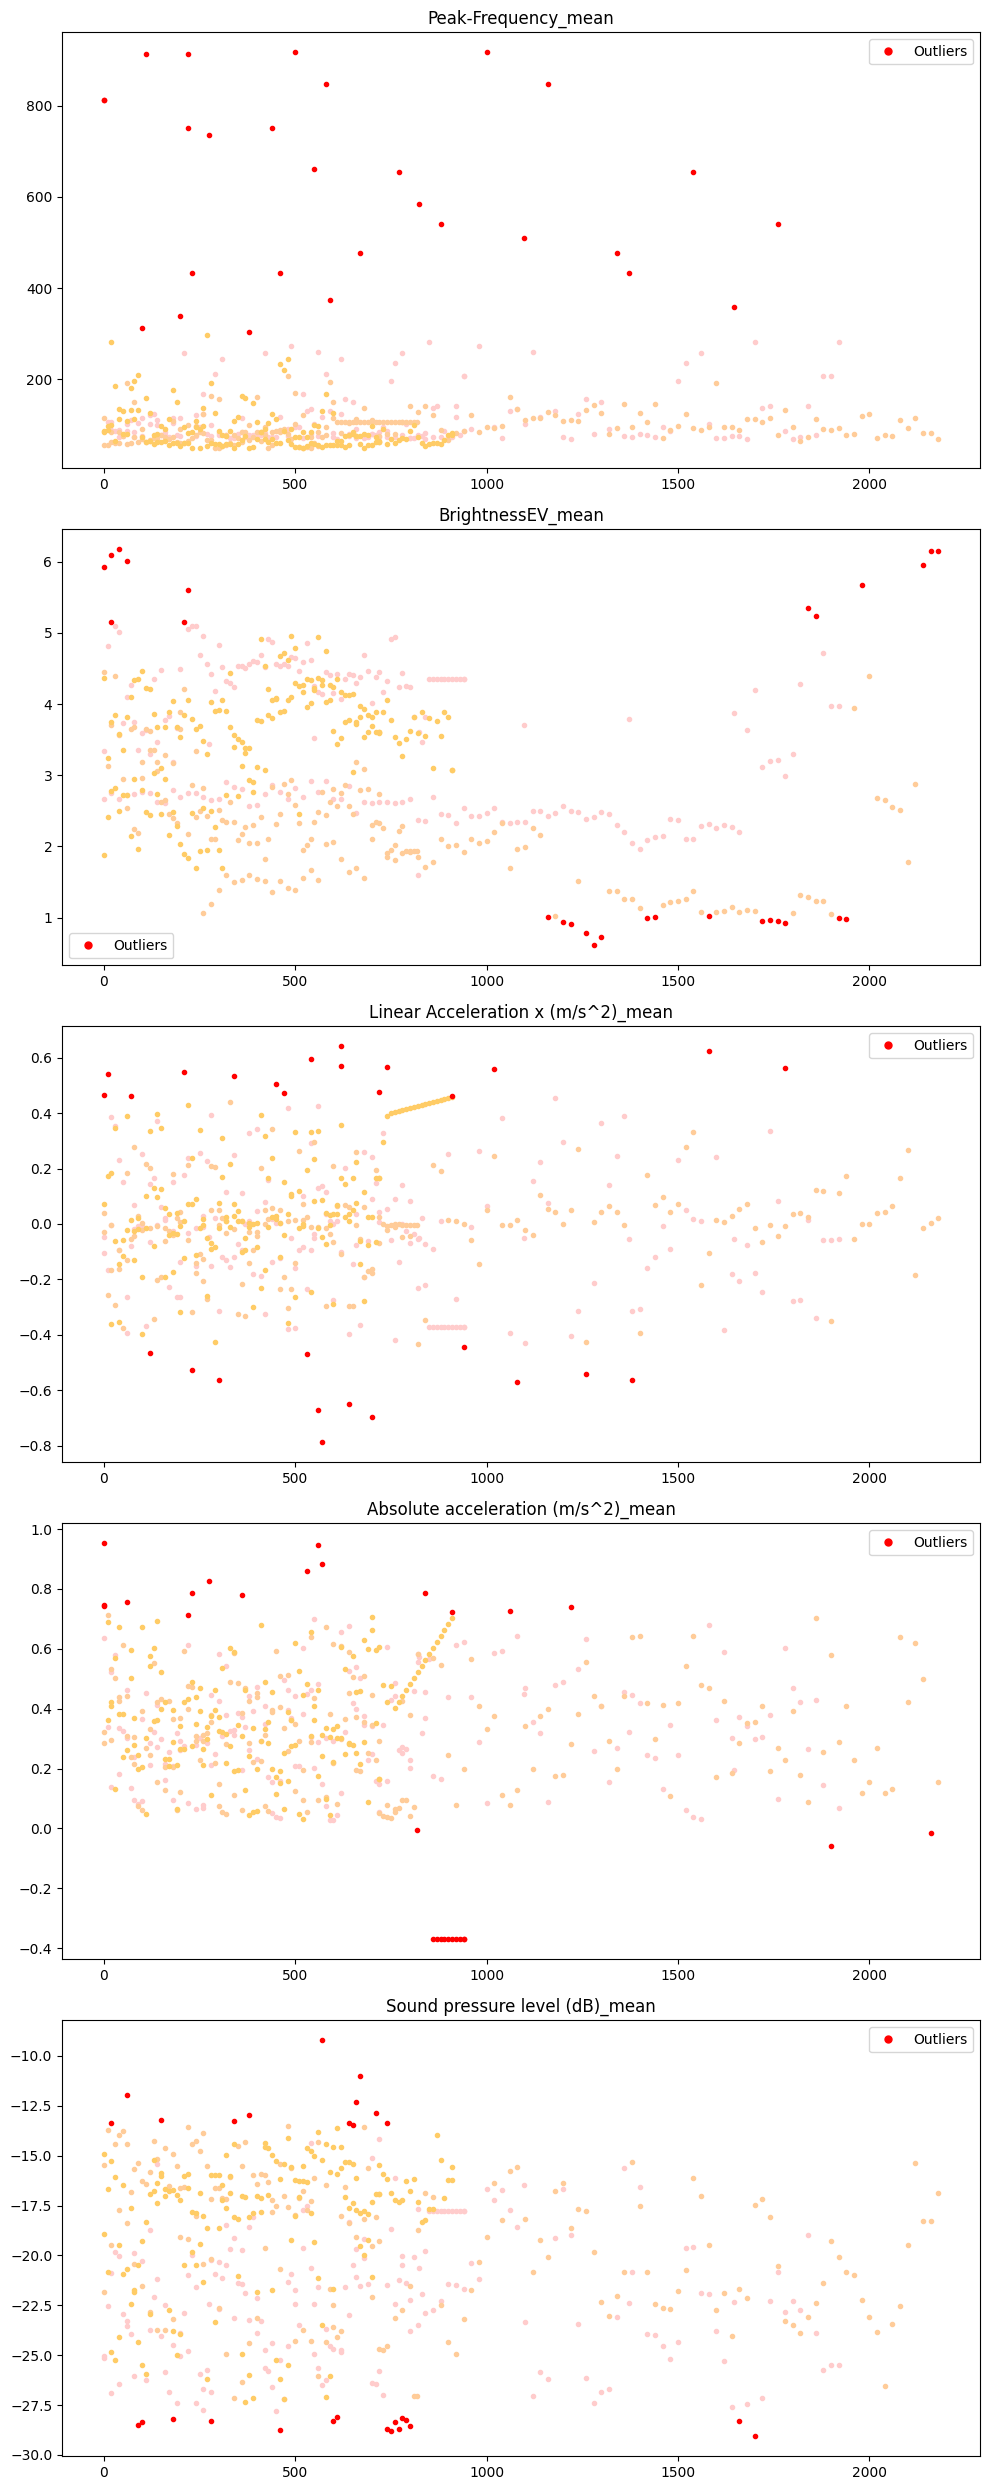

In [777]:
dot_plots_legend(df_with_outlier, ['Yaoyi', 'Esmee', 'Kiara'], ['Peak-Frequency_mean', 'BrightnessEV_mean', 'Linear Acceleration x (m/s^2)_mean', 'Absolute acceleration (m/s^2)_mean', 'Sound pressure level (dB)_mean'], mark_outliers=True)

In [513]:
class KalmanFilters:

    # Very simple Kalman filter: fill missing values and remove outliers for single attribute.
    # We assume a very simple transition matrix, namely simply a [[1]]. It
    # is however still useful as it is able to dampen outliers and impute missing values. The new
    # values are appended in a new column.
    def apply_kalman_filter(self, data_table, col):

        # Initialize the Kalman filter with the trivial transition and observation matrices.
        kf = KalmanFilter(transition_matrices=[[1]], observation_matrices=[[1]])

        numpy_array_state = data_table[col].values
        numpy_array_state = numpy_array_state.astype(np.float32)
        numpy_matrix_state_with_mask = np.ma.masked_invalid(numpy_array_state)

        # Find the best other parameters based on the data (e.g. Q)
        kf = kf.em(numpy_matrix_state_with_mask, n_iter=5)

        # And apply the filter.
        (new_data, filtered_state_covariances) = kf.filter(numpy_matrix_state_with_mask)

        data_table[col + '_kalman'] = new_data
        return data_table

In [520]:
kalmanfilter = KalmanFilters()
kalmanfilter.apply_kalman_filter(final_merged, 'BrightnessEV_mean')

,timestamp,BrightnessEV_max,BrightnessEV_min,BrightnessEV_median,BrightnessEV_mean,BrightnessEV_std,trial,experimenter,Peak-Frequency_max,Peak-Frequency_min,Peak-Frequency_median,Peak-Frequency_mean,Peak-Frequency_std,BrightnessEV_mean_kalman
0,0.000000,5.217745,2.806646,4.925790,4.367730,0.773261,1,Yaoyi,328.1250,23.4375,70.3125,86.878272,58.249345,4.015614
1,10.000000,3.977600,2.366145,3.631462,3.236934,0.611588,1,Yaoyi,468.7500,23.4375,70.3125,89.039522,65.774094,3.522059
2,20.000000,4.268351,2.666314,3.905280,3.746452,0.460463,1,Yaoyi,328.1250,23.4375,70.3125,98.437500,82.169429,3.674801
3,30.000000,4.125019,3.472224,3.838063,3.838791,0.141939,1,Yaoyi,210.9375,23.4375,70.3125,63.829787,19.512886,3.787199
4,40.000000,3.706965,3.436663,3.588194,3.584101,0.060966,1,Yaoyi,351.5625,23.4375,70.3125,112.451425,72.852855,3.647902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,910.000000,NaN,NaN,NaN,NaN,NaN,2,Esmee,210.9375,46.8750,70.3125,73.881662,32.002671,4.282106
547,920.000000,NaN,NaN,NaN,NaN,NaN,2,Esmee,3585.9375,46.8750,70.3125,141.717940,435.360435,4.282106
548,930.000000,NaN,NaN,NaN,NaN,NaN,2,Esmee,375.0000,23.4375,70.3125,78.162925,71.011924,4.282106
549,940.000000,NaN,NaN,NaN,NaN,NaN,2,Esmee,351.5625,46.8750,210.9375,206.676136,148.520248,4.282106


In [778]:
def replace_outliers_neighborhood_avg(data_frame, outlier_column_name='BrightnessEV_mean_outlier'):
    # Copy the DataFrame to avoid modifying the original data
    modified_data = data_frame.copy()
    
    # Find indices of outliers
    outlier_indices = modified_data.index[modified_data[outlier_column_name] == True].tolist()
    
    # Loop through each outlier
    for outlier_index in outlier_indices:
        # Extract trial and experimenter of the outlier
        outlier_trial = modified_data.at[outlier_index, 'trial']
        outlier_experimenter = modified_data.at[outlier_index, 'experimenter']
        
        # Find data points belonging to the same trial and experimenter
        same_trial_experimenter_data = modified_data[
            (modified_data['trial'] == outlier_trial) &
            (modified_data['experimenter'] == outlier_experimenter)
        ]
        
        # Calculate pairwise distances between data points
        distances = cdist(
            same_trial_experimenter_data[['BrightnessEV_mean']],
            same_trial_experimenter_data[['BrightnessEV_mean']],
            metric='euclidean'
        )
        
        # Set a threshold for neighborhood (e.g., 2 times standard deviation)
        neighborhood_threshold = 2 * np.std(same_trial_experimenter_data['BrightnessEV_mean'])
        
        # Find indices of data points within the neighborhood
        neighborhood_indices = np.where(distances <= neighborhood_threshold)[0]
        
        # Calculate the mean of the neighborhood
        neighborhood_mean = np.mean(same_trial_experimenter_data.iloc[neighborhood_indices]['BrightnessEV_mean'])
        
        # Replace the outlier with the neighborhood mean
        modified_data.at[outlier_index, 'BrightnessEV_mean'] = neighborhood_mean
        
        # Update the outlier flag
        modified_data.at[outlier_index, outlier_column_name] = False
    
    return modified_data

In [779]:
df = replace_outliers_neighborhood_avg(df_with_outlier)

# **Noise**

In [780]:
def normalize_dataset(data_table, columns):
    dt_norm = copy.deepcopy(data_table)
    for col in columns:
        if col in data_table.columns:
            dt_norm[col] = (data_table[col] - data_table[col].mean()) / (data_table[col].max() - data_table[col].min())
        else:
            raise KeyError(f"Column '{col}' not found in data table.")
    return dt_norm

class PrincipalComponentAnalysis:

    pca = []

    def __init__(self):
        self.pca = []

    # Perform the PCA on the selected columns and return the explained variance.
    def determine_pc_explained_variance(self, data_table, cols):
        # Normalize the data first.
        dt_norm = normalize_dataset(data_table, cols)

        # perform the PCA.
        self.pca = PCA(n_components = len(cols))
        self.pca.fit(dt_norm[cols])
        # And return the explained variances.
        return self.pca.explained_variance_ratio_

    # Apply a PCA given the number of components we have selected.
    # We add new pca columns.
    def apply_pca(self, data_table, cols, number_comp):
        # Normalize the data first.
        dt_norm = normalize_dataset(data_table, cols)

        # perform the PCA.
        self.pca = PCA(n_components = number_comp)
        self.pca.fit(dt_norm[cols])

        # Transform our old values.
        new_values = self.pca.transform(dt_norm[cols])

        #And add the new ones:
        for comp in range(0, number_comp):
            data_table['pca_' +str(comp+1)] = new_values[:,comp]

        return data_table

In [781]:
pca = PrincipalComponentAnalysis()
pca.apply_pca(df_with_outlier, ['BrightnessEV_mean'], 1)

,timestamp,BrightnessEV_max,BrightnessEV_min,BrightnessEV_median,BrightnessEV_mean,BrightnessEV_std,trial,experimenter,Peak-Frequency_max,Peak-Frequency_min,...,Peak-Frequency_mean_outlier,BrightnessEV_mean_mixture,BrightnessEV_mean_outlier,Linear Acceleration x (m/s^2)_mean_mixture,Linear Acceleration x (m/s^2)_mean_outlier,Absolute acceleration (m/s^2)_mean_mixture,Absolute acceleration (m/s^2)_mean_outlier,Sound pressure level (dB)_mean_mixture,Sound pressure level (dB)_mean_outlier,pca_1
0,0.000000,2.726657,2.566588,2.668838,2.663895,0.040507,1,Esmee,2203.1250,46.8750,...,True,0.391517,False,1.415957,False,0.683709,False,0.054592,False,-0.080000
1,20.000000,2.790788,2.689758,2.762637,2.754005,0.025433,1,Esmee,351.5625,46.8750,...,False,0.334346,False,3.093720,False,1.243115,False,0.039841,False,-0.063817
2,40.000000,2.776781,2.514413,2.723005,2.668750,0.090246,1,Esmee,351.5625,23.4375,...,False,0.388691,False,1.594471,False,1.588436,False,0.046123,False,-0.079128
3,60.000000,3.050887,2.537872,2.638953,2.717340,0.153931,1,Esmee,398.4375,23.4375,...,False,0.358532,False,0.595078,False,2.109937,False,0.063713,False,-0.070402
4,80.000000,2.858242,2.692066,2.713852,2.738186,0.045587,1,Esmee,421.8750,23.4375,...,False,0.344865,False,2.064367,False,1.964064,False,0.059767,False,-0.066658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,690.000000,4.189180,3.009313,3.984517,3.846419,0.361844,2,Yaoyi,210.9375,46.8750,...,False,0.289823,False,2.872754,False,0.854227,False,0.059915,False,0.132363
555,700.000000,4.102669,3.415472,3.735839,3.695416,0.190615,2,Yaoyi,281.2500,23.4375,...,False,0.265253,False,2.899395,False,0.576666,False,0.075504,False,0.105246
556,710.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,187.5000,23.4375,...,False,0.247561,False,0.632213,False,0.865876,False,0.106783,False,0.090322
557,720.000000,4.226719,3.231607,3.458179,3.612313,0.357891,2,Yaoyi,70.3125,46.8750,...,False,0.247561,False,0.632213,False,1.458539,False,0.106783,False,0.090322


In [512]:
# # Distance based, but the outliers are upmost, idk why

# import numpy as np
# import pandas as pd
# import copy
# from sklearn.metrics.pairwise import cosine_similarity
# import scipy.spatial

# class DistanceBasedOutlierDetection:

#     @staticmethod
#     def euclidean_distance(x, y):
#         return np.sqrt(np.sum((x - y) ** 2))

#     @staticmethod
#     def manhattan_distance(x, y):
#         return np.sum(np.abs(x - y))
        
#     @staticmethod
#     def cosine_distance(x, y):
#         return 1 - cosine_similarity([x], [y])[0][0]
    
#     @staticmethod
#     def minkowski_distance(x, y, p=3):
#         return np.sum(np.abs(x - y) ** p) ** (1 / p)
    
#     @staticmethod
#     def normalize_dataset(data_table, columns):
#         dt_norm = copy.deepcopy(data_table)
#         for col in columns:
#             if col in data_table.columns:
#                 dt_norm[col] = (data_table[col] - data_table[col].mean()) / (data_table[col].max() - data_table[col].min())
#             else:
#                 raise KeyError(f"Column '{col}' not found in data table.")
#         return dt_norm

#     def distance_table(self, data_table, cols, d_function):
#         num_rows = len(data_table)
#         distances = np.zeros((num_rows, num_rows))
#         for i in range(num_rows):
#             for j in range(i + 1, num_rows):
#                 dist = d_function(data_table.iloc[i][cols].values, data_table.iloc[j][cols].values)
#                 distances[i, j] = dist
#                 distances[j, i] = dist
#         return distances

#     def simple_distance_based(self, data_table, cols, d_function, dmin, fmin):
#         print('Calculating simple distance-based criterion.')

#         # Normalize the dataset first.
#         new_data_table = self.normalize_dataset(data_table.dropna(axis=0, subset=cols), cols)

#         # Create the distance table first between all instances:
#         self.distances = self.distance_table(new_data_table, cols, d_function)

#         mask = []
#         # Pass the rows in our table.
#         for i in range(len(new_data_table.index)):
#             # Check what faction of neighbors are beyond dmin.
#             frac = (float(sum([1 for col_val in self.distances[i, :] if col_val > dmin])) / len(new_data_table.index))
#             # Mark as an outlier if beyond the minimum frequency.
#             mask.append(frac > fmin)
        
#         outlier_column_name = f"{cols[0]}_outlier" if isinstance(cols, list) and len(cols) == 1 else "simple_dist_outlier"
#         data_table[outlier_column_name] = pd.Series(mask, index=new_data_table.index)
        
#         del self.distances
#         return data_table

#     def local_outlier_factor(self, data_table, cols, d_function, k):
#         print("Calculating local outlier factor.")

#         # Ensure cols is a list
#         if isinstance(cols, str):
#             cols = [cols]
        
#         # Normalize the dataset first.
#         new_data_table = self.normalize_dataset(data_table.dropna(axis=0, subset=cols), cols)
        
#         # Create the distance table first between all instances:
#         self.distances = self.distance_table(new_data_table, cols, d_function)
        
#         outlier_factor = []
#         # Compute the outlier score per row.
#         for i in range(len(new_data_table.index)):
#             if i % 100 == 0:
#                 print(f'Completed {i} steps for LOF.')
#             outlier_factor.append(self.local_outlier_factor_instance(i, k))
        
#         data_outlier_probs = pd.DataFrame(outlier_factor, index=new_data_table.index, columns=['lof'])
        
#         # Determine which rows are outliers
#         outlier_column_name = f"{cols[0]}_outlier"
#         data_outlier_probs[outlier_column_name] = data_outlier_probs['lof'] > 1.0
        
#         # Merge the LOF scores and dynamically named outlier flags back into the original data table
#         data_table = pd.concat([data_table, data_outlier_probs[['lof', outlier_column_name]]], axis=1)
        
#         del self.distances
#         return data_table

#     def reachability_distance(self, k, i1, i2):
#         k_distance_value, neighbors = self.k_distance(i2, k)
#         return max([k_distance_value, self.distances[i1, i2]])

#     HIGH_VALUE = 10000

#     def local_reachability_density(self, instance, k, k_distance_i, neighbors_i):
#         reachability_distances_array = [0] * len(neighbors_i)
#         for i, neighbor in enumerate(neighbors_i):
#             reachability_distances_array[i] = self.reachability_distance(k, instance, neighbor)
#         if not any(reachability_distances_array) or sum(reachability_distances_array) == 0:
#             return float(self.HIGH_VALUE)
#         else:
#             return len(neighbors_i) / sum(reachability_distances_array)

#     def k_distance(self, i, k):
#         neighbors = np.argpartition(np.array(self.distances[i, :]), k + 1)[0:(k + 1)].tolist()
#         if i in neighbors:
#             neighbors.remove(i)
#         return max(self.distances[i, neighbors]), neighbors

#     def local_outlier_factor_instance(self, i, k):
#         k_distance_value, neighbors = self.k_distance(i, k)
#         instance_lrd = self.local_reachability_density(i, k, k_distance_value, neighbors)
#         lrd_ratios_array = [0] * len(neighbors)
#         for i, neighbor in enumerate(neighbors):
#             k_distance_value_neighbor, neighbors_neighbor = self.k_distance(neighbor, k)
#             neighbor_lrd = self.local_reachability_density(neighbor, k, k_distance_value_neighbor, neighbors_neighbor)
#             lrd_ratios_array[i] = neighbor_lrd / instance_lrd
#         return sum(lrd_ratios_array) / len(neighbors)

# # Example usage
# outlier = DistanceBasedOutlierDetection()

# # Ensure final_merged is correctly defined before this call
# # For example, define final_merged as follows if it's not already defined:
# # final_merged = pd.DataFrame({'BrightnessEV_mean': [0.1, 0.2, 0.3, 0.4]})

# # Print column names for debugging
# print("Columns in final_merged:", final_merged.columns)

# # Call the local_outlier_factor method
# final_merged = outlier.local_outlier_factor(final_merged, 'BrightnessEV_mean', DistanceBasedOutlierDetection.euclidean_distance, 20)

# # Print the resulting DataFrame to check the added columns
# print(final_merged)